In [ ]:
### Group ID:
### Group Members Name with Student ID:
1. Pooja Patila (2023aa05194)
2. Kashyap Rajpurohit (2023 
3. Student 3
4. Student 4


The Multi-Armed Bandit (MAB) algorithm is a type of reinforcement learning algorithm used to solve problems where an agent must make a series of decisions to maximize its total reward over time. The term "multi-armed bandit" comes from the analogy of a gambler facing several slot machines (referred to as "one-armed bandits" due to the lever) and needing to decide which machines to play, how many times to play each one, and in what sequence to play them in order to maximize the total reward (or payout).

**Problem Setup**
In the MAB problem, we have:

**Multiple Arms (or Options):** Each arm represents a different choice or action, similar to different slot machines.
Rewards: Pulling an arm (taking an action) yields a reward, which can vary each time the arm is pulled.
The objective is to develop a strategy to choose the arms in such a way as to maximize the cumulative reward over time.

**Challenges:**

Exploration vs. Exploitation:
Exploration: Trying out different arms to gather more information about their potential rewards.
Exploitation: Using the information already gathered to maximize the reward by choosing the arm with the highest estimated payoff.

**Algorithms:**

Several algorithms address the MAB problem by balancing
exploration and exploitation:

**Random Policy:** Selects arms at random without considering the past rewards.

**Greedy Policy**: Always selects the arm with the highest known average reward (exploitation only).

**Epsilon-Greedy Policy:** With probability epsilon, it explores by selecting a random arm; otherwise, it exploits by selecting the arm with the highest known reward.

**Upper Confidence Bound (UCB):** Selects arms based on both the average reward and the uncertainty (variance) in the reward estimates, favoring less-explored arms.
Thompson Sampling: Uses a probabilistic approach to balance exploration and exploitation by sampling from the posterior distribution of the reward probabilities.


In [2]:
import numpy as np
import pandas as pd

# Initialize constants
epsilon = 0.1

# Load Dataset
file_path = 'AD_Click.csv'
ad_click_data = pd.read_csv(file_path)

# Print dataset statistics
print(ad_click_data.describe())


              Age
count  780.000000
mean    37.500000
std      7.504812
min     25.000000
25%     31.000000
50%     37.500000
75%     44.000000
max     50.000000


In [3]:
# Print the first few rows of the dataset
print(ad_click_data.head())


   Age Gender         City Phone_OS
0   25   Male     New York      iOS
1   25   Male     New York  Android
2   25   Male     New York    Other
3   25   Male  Los Angeles      iOS
4   25   Male  Los Angeles  Android


In [4]:
class CTREnvironment:
  # Initialize with data and set up probabilities based on gender.
    def __init__(self, data):
        self.data = data
        self.n_arms = len(data)
        self.probabilities = {
            'Male': 0.7,
            'Female': 0.6
        }
  # Simulate click probability for the arm at arm_index.
    def get_reward(self, arm_index):
        row = self.data.iloc[arm_index]
        gender = row['Gender']
        click_prob = self.probabilities[gender]
        return np.random.rand() < click_prob


In [5]:
class RandomPolicy:
    def __init__(self, n_arms):
        self.n_arms = n_arms

    def select_arm(self):
        return np.random.randint(self.n_arms)

# Initialize environment and policy
env = CTREnvironment(ad_click_data)
random_policy = RandomPolicy(env.n_arms)

# Run the environment with the random policy
n_iterations = 1000
total_reward = 0

for i in range(n_iterations):
    chosen_arm = random_policy.select_arm()
    reward = env.get_reward(chosen_arm)
    total_reward += reward
    print(f"Iteration {i+1}: Chosen Arm = {chosen_arm}, Reward = {reward}")

overall_ctr = total_reward / n_iterations
print(f"Overall CTR with Random Policy: {overall_ctr}")


Iteration 1: Chosen Arm = 470, Reward = False
Iteration 2: Chosen Arm = 595, Reward = False
Iteration 3: Chosen Arm = 333, Reward = True
Iteration 4: Chosen Arm = 80, Reward = False
Iteration 5: Chosen Arm = 607, Reward = True
Iteration 6: Chosen Arm = 36, Reward = True
Iteration 7: Chosen Arm = 571, Reward = True
Iteration 8: Chosen Arm = 440, Reward = False
Iteration 9: Chosen Arm = 127, Reward = False
Iteration 10: Chosen Arm = 758, Reward = False
Iteration 11: Chosen Arm = 76, Reward = True
Iteration 12: Chosen Arm = 735, Reward = True
Iteration 13: Chosen Arm = 605, Reward = True
Iteration 14: Chosen Arm = 33, Reward = False
Iteration 15: Chosen Arm = 260, Reward = True
Iteration 16: Chosen Arm = 699, Reward = False
Iteration 17: Chosen Arm = 590, Reward = False
Iteration 18: Chosen Arm = 398, Reward = True
Iteration 19: Chosen Arm = 80, Reward = True
Iteration 20: Chosen Arm = 616, Reward = True
Iteration 21: Chosen Arm = 286, Reward = True
Iteration 22: Chosen Arm = 163, Reward 

In [6]:
# Run the random policy simulation and store the CTR
random_policy = RandomPolicy(env.n_arms)
total_reward_random = 0
for i in range(n_iterations):
    chosen_arm = random_policy.select_arm()
    reward = env.get_reward(chosen_arm)
    total_reward_random += reward
random_policy_ctr = total_reward_random / n_iterations

In [7]:
class GreedyPolicy:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.values = np.zeros(n_arms)  # Average reward for each arm

    def select_arm(self):
        return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.values[chosen_arm] = reward

# Initialize environment and policy
greedy_policy = GreedyPolicy(env.n_arms)

# Run the environment with the greedy policy
total_reward = 0

for i in range(n_iterations):
    chosen_arm = greedy_policy.select_arm()
    reward = env.get_reward(chosen_arm)
    greedy_policy.update(chosen_arm, reward)
    total_reward += reward
    print(f"Iteration {i+1}: Chosen Arm = {chosen_arm}, Reward = {reward}")

overall_ctr = total_reward / n_iterations
print(f"Overall CTR with Greedy Policy: {overall_ctr}")


Iteration 1: Chosen Arm = 0, Reward = True
Iteration 2: Chosen Arm = 0, Reward = True
Iteration 3: Chosen Arm = 0, Reward = True
Iteration 4: Chosen Arm = 0, Reward = True
Iteration 5: Chosen Arm = 0, Reward = False
Iteration 6: Chosen Arm = 0, Reward = True
Iteration 7: Chosen Arm = 0, Reward = False
Iteration 8: Chosen Arm = 0, Reward = True
Iteration 9: Chosen Arm = 0, Reward = True
Iteration 10: Chosen Arm = 0, Reward = True
Iteration 11: Chosen Arm = 0, Reward = True
Iteration 12: Chosen Arm = 0, Reward = True
Iteration 13: Chosen Arm = 0, Reward = True
Iteration 14: Chosen Arm = 0, Reward = True
Iteration 15: Chosen Arm = 0, Reward = True
Iteration 16: Chosen Arm = 0, Reward = True
Iteration 17: Chosen Arm = 0, Reward = True
Iteration 18: Chosen Arm = 0, Reward = True
Iteration 19: Chosen Arm = 0, Reward = True
Iteration 20: Chosen Arm = 0, Reward = True
Iteration 21: Chosen Arm = 0, Reward = True
Iteration 22: Chosen Arm = 0, Reward = True
Iteration 23: Chosen Arm = 0, Reward = 

In [8]:
# Run the greedy policy simulation and store the CTR
greedy_policy = GreedyPolicy(env.n_arms)
total_reward_greedy = 0
for i in range(n_iterations):
    chosen_arm = greedy_policy.select_arm()
    reward = env.get_reward(chosen_arm)
    greedy_policy.update(chosen_arm, reward)
    total_reward_greedy += reward
greedy_policy_ctr = total_reward_greedy / n_iterations

In [9]:
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon=0.1):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm was selected
        self.values = np.zeros(n_arms)  # Average reward for each arm

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Initialize environment and policy
epsilon_greedy = EpsilonGreedy(env.n_arms, epsilon)

# Run the environment with the epsilon-greedy policy
total_reward = 0

for i in range(n_iterations):
    chosen_arm = epsilon_greedy.select_arm()
    reward = env.get_reward(chosen_arm)
    epsilon_greedy.update(chosen_arm, reward)
    total_reward += reward
    print(f"Iteration {i+1}: Chosen Arm = {chosen_arm}, Reward = {reward}")

overall_ctr = total_reward / n_iterations
print(f"Overall CTR with Epsilon-Greedy Policy: {overall_ctr}")


Iteration 1: Chosen Arm = 0, Reward = True
Iteration 2: Chosen Arm = 0, Reward = True
Iteration 3: Chosen Arm = 0, Reward = True
Iteration 4: Chosen Arm = 0, Reward = True
Iteration 5: Chosen Arm = 0, Reward = True
Iteration 6: Chosen Arm = 0, Reward = False
Iteration 7: Chosen Arm = 0, Reward = True
Iteration 8: Chosen Arm = 0, Reward = True
Iteration 9: Chosen Arm = 0, Reward = True
Iteration 10: Chosen Arm = 0, Reward = False
Iteration 11: Chosen Arm = 0, Reward = True
Iteration 12: Chosen Arm = 0, Reward = True
Iteration 13: Chosen Arm = 115, Reward = False
Iteration 14: Chosen Arm = 0, Reward = True
Iteration 15: Chosen Arm = 0, Reward = False
Iteration 16: Chosen Arm = 0, Reward = True
Iteration 17: Chosen Arm = 0, Reward = True
Iteration 18: Chosen Arm = 0, Reward = False
Iteration 19: Chosen Arm = 0, Reward = True
Iteration 20: Chosen Arm = 0, Reward = True
Iteration 21: Chosen Arm = 0, Reward = False
Iteration 22: Chosen Arm = 721, Reward = True
Iteration 23: Chosen Arm = 721,

In [10]:
# Run the epsilon greedy policy simulation and store the CTR
epsilon_greedy = EpsilonGreedy(env.n_arms, epsilon)
total_reward_epsilon_greedy = 0
for i in range(n_iterations):
    chosen_arm = epsilon_greedy.select_arm()
    reward = env.get_reward(chosen_arm)
    epsilon_greedy.update(chosen_arm, reward)
    total_reward_epsilon_greedy += reward
epsilon_greedy_ctr = total_reward_epsilon_greedy / n_iterations

In [11]:
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        if 0 in self.counts:
            return np.argmin(self.counts)
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value

# Initialize environment and policy
ucb = UCB(env.n_arms)

# Run the environment with the UCB policy
total_reward = 0

for i in range(n_iterations):
    chosen_arm = ucb.select_arm()
    reward = env.get_reward(chosen_arm)
    ucb.update(chosen_arm, reward)
    total_reward += reward
    print(f"Iteration {i+1}: Chosen Arm = {chosen_arm}, Reward = {reward}")

overall_ctr = total_reward / n_iterations
print(f"Overall CTR with UCB Policy: {overall_ctr}")


Iteration 1: Chosen Arm = 0, Reward = False
Iteration 2: Chosen Arm = 1, Reward = False
Iteration 3: Chosen Arm = 2, Reward = True
Iteration 4: Chosen Arm = 3, Reward = True
Iteration 5: Chosen Arm = 4, Reward = True
Iteration 6: Chosen Arm = 5, Reward = True
Iteration 7: Chosen Arm = 6, Reward = True
Iteration 8: Chosen Arm = 7, Reward = True
Iteration 9: Chosen Arm = 8, Reward = True
Iteration 10: Chosen Arm = 9, Reward = True
Iteration 11: Chosen Arm = 10, Reward = True
Iteration 12: Chosen Arm = 11, Reward = False
Iteration 13: Chosen Arm = 12, Reward = True
Iteration 14: Chosen Arm = 13, Reward = True
Iteration 15: Chosen Arm = 14, Reward = True
Iteration 16: Chosen Arm = 15, Reward = True
Iteration 17: Chosen Arm = 16, Reward = True
Iteration 18: Chosen Arm = 17, Reward = True
Iteration 19: Chosen Arm = 18, Reward = True
Iteration 20: Chosen Arm = 19, Reward = True
Iteration 21: Chosen Arm = 20, Reward = True
Iteration 22: Chosen Arm = 21, Reward = False
Iteration 23: Chosen Arm 

In [12]:
# Run the UCB policy simulation and store the CTR
ucb = UCB(env.n_arms)
total_reward_ucb = 0
for i in range(n_iterations):
    chosen_arm = ucb.select_arm()
    reward = env.get_reward(chosen_arm)
    ucb.update(chosen_arm, reward)
    total_reward_ucb += reward
ucb_ctr = total_reward_ucb / n_iterations

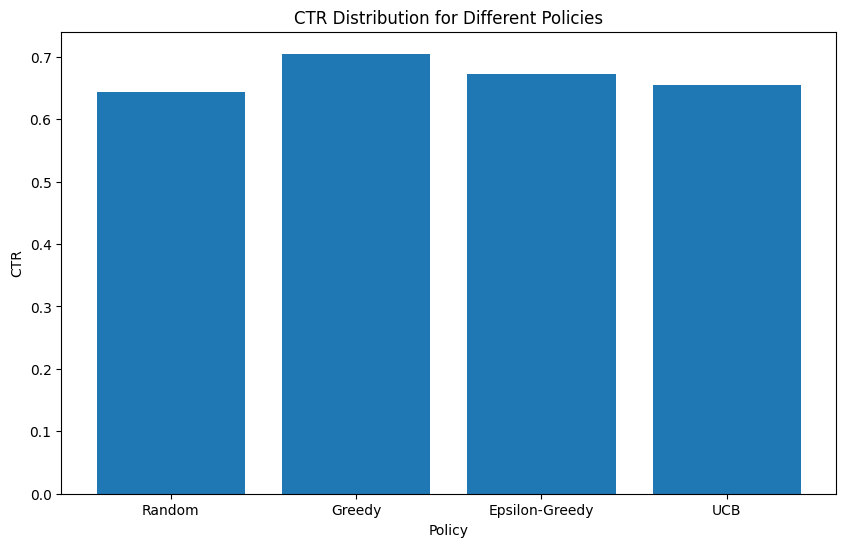

In [19]:
# Plot CTR distribution for all approaches
import matplotlib.pyplot as plt

ctr_results = {
    'Random': random_policy_ctr,
    'Greedy': greedy_policy_ctr,
    'Epsilon-Greedy': epsilon_greedy_ctr,
    'UCB': ucb_ctr
}

plt.figure(figsize=(10, 6))
plt.bar(ctr_results.keys(), ctr_results.values())
plt.xlabel('Policy')
plt.ylabel('CTR')
plt.title('CTR Distribution for Different Policies')
plt.show()


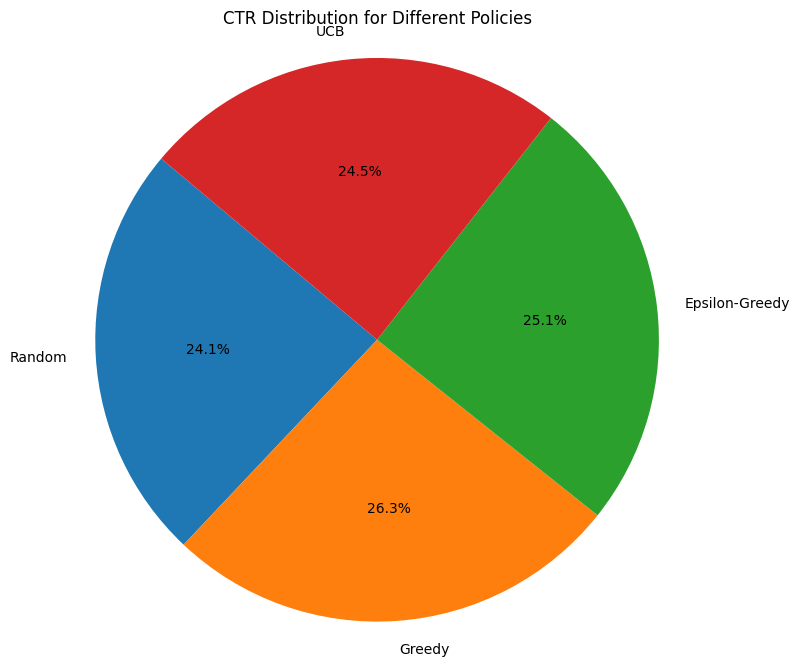

In [29]:
labels = ['Random', 'Greedy', 'Epsilon-Greedy', 'UCB']
sizes = [random_policy_ctr, greedy_policy_ctr, epsilon_greedy_ctr, ucb_ctr]

#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('CTR Distribution for Different Policies')
plt.axis('equal')
plt.show()


In [18]:
# Test different exploration percentages and alpha values
explore_percentages = [0.1, 0.15, 0.2]
alpha_values = [0.1, 0.5, 1]

# Store results for better readability
results = []

for epsilon in explore_percentages:
    for alpha in alpha_values:
        epsilon_greedy = EpsilonGreedy(env.n_arms, epsilon)
        total_reward = 0
        for i in range(n_iterations):
            chosen_arm = epsilon_greedy.select_arm()
            reward = env.get_reward(chosen_arm)
            epsilon_greedy.update(chosen_arm, reward)
            total_reward += reward
        overall_ctr = total_reward / n_iterations
        results.append((epsilon, alpha, overall_ctr))

# Print results in a formatted manner
print("\nResults for Epsilon-Greedy Policy with Different Exploration Percentages and Alpha Values:")
print("\n")
print(f"{'Epsilon':<10} {'Alpha':<10} {'Overall CTR':<10}")
print("-" * 30)
for epsilon, alpha, overall_ctr in results:
    print(f"{epsilon:<10} {alpha:<10} {overall_ctr:<10.4f}")



Results for Epsilon-Greedy Policy with Different Exploration Percentages and Alpha Values:


Epsilon    Alpha      Overall CTR
------------------------------
0.1        0.1        0.6720    
0.1        0.5        0.6740    
0.1        1          0.6820    
0.15       0.1        0.6700    
0.15       0.5        0.6650    
0.15       1          0.6790    
0.2        0.1        0.6660    
0.2        0.5        0.7040    
0.2        1          0.6850    


**Low Exploration Percentage** (e.g., 0.1): The algorithm exploits known arms more frequently, leading to a potentially higher immediate reward but might miss out on better arms that haven't been explored sufficiently.

**Moderate Exploration Percentage** (e.g., 0.15): A balanced approach that allows for more exploration while still exploiting known rewards. This could lead to discovering better arms while maintaining good performance.

**High Exploration Percentage** (e.g., 0.2): The algorithm explores more frequently, which may lead to discovering better arms in the long run but might also result in lower immediate rewards due to less exploitation of known good arms.

brief overview of the best approach for maximizing Click-Through Rate (CTR) using the tested policies:

**Random Policy:** Provides a baseline CTR by randomly selecting arms without learning from outcomes, resulting in average performance that reflects the defined probabilities for each arm.

**Greedy Policy:** Initially achieves high CTR by always exploiting the arm with the highest observed reward. However, it risks getting stuck with suboptimal choices due to limited exploration.

**Epsilon-Greedy Policy:** Strikes a balance between exploration and exploitation by randomly exploring a fraction of the time (epsilon) and otherwise exploiting the best-known arm. This adaptive strategy tends to yield higher CTR over time by continuously exploring and leveraging high-performing arms.

**UCB (Upper Confidence Bound) Policy:** Balances exploration and exploitation by using confidence intervals to guide arm selection. It optimizes CTR by dynamically adjusting choices based on uncertainty and average rewards, effectively maximizing cumulative rewards over iterations.

**Conclusion:** Among the policies tested, the epsilon-greedy policy with adaptive exploration and UCB policy demonstrate superior performance in maximizing CTR. Epsilon-greedy policy balances between exploring new arms and exploiting the best-known options, adapting well to varying conditions. Meanwhile, UCB policy optimizes CTR by intelligently balancing between exploration of potentially high-reward arms and exploitation of known good options. Combining these approaches offers a robust strategy for achieving high CTR by effectively managing the exploration-exploitation trade-off in dynamic environments.






